In [35]:
import numpy as np
from matplotlib import pyplot as plt

We're not using keras for neural nets. After we dicided to use CIFAR-10, we saw that Eric had an import for it in the notebook "12. More Advanced CNN Techniques"

In [40]:
from keras.datasets import cifar10
import pickle

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_train_labels = [class_labels[int(val)] for val in y_train]

print(type(x_train))
print(x_train.shape)
print(y_train.shape)
print(class_labels)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
(50000, 1)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [31]:
vectorized_color = np.reshape(x_train,(len(x_train),32*32,3))
color_pixels = np.reshape(vectorized_color,(len(vectorized_color)*32*32,3))
print(color_pixels.shape)

(51200000, 3)


Only run this one once, as it takes a long time to convert all pixels to grayscale. Simply skip this cell and run the next one

In [ ]:
#convert rgb channel to b/w channel
bw_pixels = [(0.21*pixel[0])+(0.72*pixel[1])+(0.07*pixel[2]) for pixel in color_pixels]
#reconstruct to list in image vectors
vectorized_bw = np.reshape(bw_pixels,(len(x_train),32*32))
vectorized_bw.dump("data/vectorized_bw")

In [33]:
vectorized_bw = np.load("data/vectorized_bw")
vectorized_bw.shape

(50000, 1024)

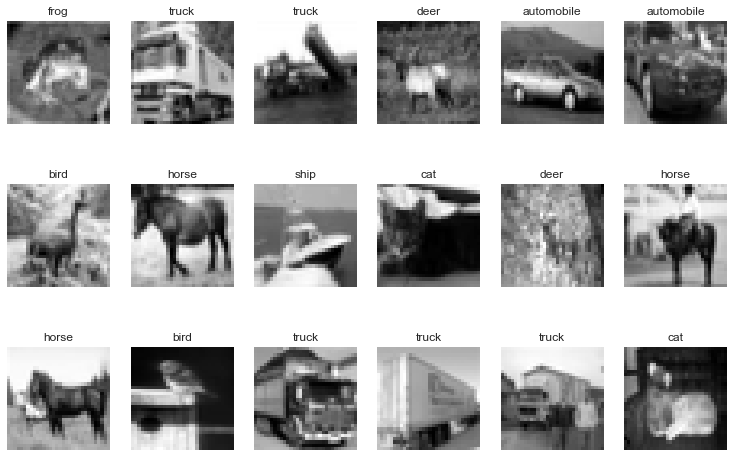

In [41]:
# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(vectorized_bw, y_train_labels, 32, 32) # defaults to showing a 3 by 6 subset of the faces